In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os

current_directory = os.getcwd()
log_file_path = os.path.join(current_directory, 'week_4.log')
logging.basicConfig(filename=log_file_path, level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('Libraries imported successfully.')

logging.info('Imported libraries are ready for use.')


Data Loading and Initial Exploration

In [7]:

train_data = pd.read_csv('../../doc4/rossmann-store-sales/train.csv')
test_data = pd.read_csv('../../doc4/rossmann-store-sales/test.csv')
store_data = pd.read_csv('../../doc4/rossmann-store-sales/store.csv')

logging.info('Datasets loaded successfully.')

train_merged = pd.merge(train_data, store_data, how='left', on='Store')
test_merged = pd.merge(test_data, store_data, how='left', on='Store')

logging.info('Train and Test datasets merged with store data.')

print(train_merged.isna().sum())
print(test_merged.isna().sum())

train_merged.fillna(method='ffill', inplace=True)
test_merged.fillna(method='ffill', inplace=True)
logging.info('Filled missing values using forward fill.')



C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3317785883.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../../doc4/rossmann-store-sales/train.csv')


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment              

C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3317785883.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_merged.fillna(method='ffill', inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_19540\3317785883.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_merged.fillna(method='ffill', inplace=True)


Check Distribution of Promotions in Training and Test Sets

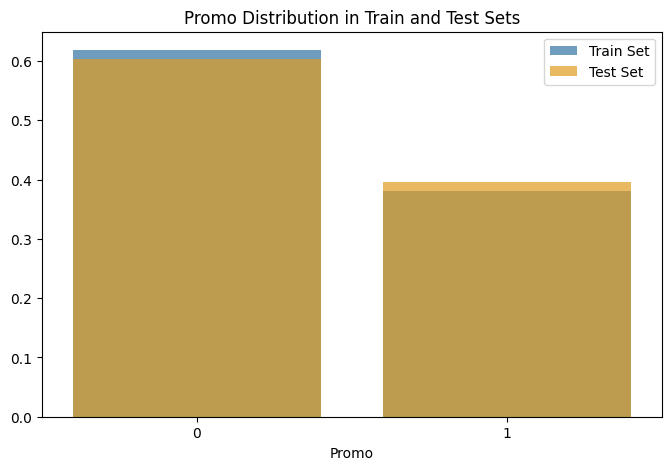

In [8]:

train_promo_dist = train_merged['Promo'].value_counts(normalize=True)
test_promo_dist = test_merged['Promo'].value_counts(normalize=True)

logging.info('Promo distribution checked in both training and test datasets.')

plt.figure(figsize=(8,5))
sns.barplot(x=train_promo_dist.index, y=train_promo_dist.values, alpha=0.7, label='Train Set')
sns.barplot(x=test_promo_dist.index, y=test_promo_dist.values, alpha=0.7, label='Test Set', color='orange')
plt.title('Promo Distribution in Train and Test Sets')
plt.legend()
plt.show()

logging.info('Promo distribution comparison plot created.')
